In [1]:
from io import BytesIO

import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import matplotlib.pyplot as plt
import hvplot.pandas
import matplotlib.gridspec as gridspec


In [2]:
def get_number_of_rows(dataframe):
    df = pd.read_csv(dataframe)
    return df.shape[0]

In [3]:
import os
path = '../data'
files = os.listdir(path)
path_files = [path + '/'+ string for string in files]
number_of_rows = [get_number_of_rows(dataframe) for dataframe in path_files]
#dict_values = [(file_name, n_rows) for file_name, n_rows in zip(path_files, number_of_rows) ]
file_entries = dict(zip(files,path_files))
file_rows = dict(zip(path_files,number_of_rows))


In [4]:
file_rows

{'../data/20220928-193156_JigsawPuzzle.csv': 1279,
 '../data/20221003-131623_JigsawPuzzle.csv': 2560,
 '../data/20220930-180439_JigsawPuzzle.csv': 4778,
 '../data/20221003-134004_JigsawPuzzle.csv': 1928,
 '../data/20221003-132953_JigsawPuzzle.csv': 2724,
 '../data/20221003-132653_JigsawPuzzle.csv': 3461,
 '../data/20221003-175958_JigsawPuzzle.csv': 3395,
 '../data/20221004-114501_JigsawPuzzle.csv': 11129,
 '../data/20221013-141842_JigsawPuzzle.csv': 1729,
 '../data/20221020-150106_JigsawPuzzle.csv': 4208,
 '../data/20221020-162555_JigsawPuzzle.csv': 1640,
 '../data/20221020-162057_JigsawPuzzle.csv': 6395,
 '../data/20221109-144049_JigsawPuzzle.csv': 2090,
 '../data/20221123-173640_JigsawPuzzle.csv': 4413,
 '../data/20221207-162655_JigsawPuzzle.csv': 2423,
 '../data/20221215-153434_JigsawPuzzle.csv': 1709,
 '../data/20221215-153316_JigsawPuzzle.csv': 1220,
 '../data/test.csv': 2724,
 '../data/test1.csv': 1933,
 '../data/.~lock.20221004-114501_JigsawPuzzle.csv#': 0,
 '../data/.~lock.2022

In [5]:
def iqr(array):
    q3, q1 = np.percentile(array,[75,25])
    IQR = q3 - q1
    upper_bound = q3 + 1.5*IQR
    lower_bound = q1 - 1.5*IQR
    return lower_bound, upper_bound

In [6]:
select = pn.widgets.Select(options=file_entries)

@pn.cache
def fetch_data(url):
    df = pd.read_csv(url)
    df.drop('time', axis = 1, inplace = True)
    df.insert(0,'time',df.index.values)
    df = df.fillna(0)
    for column in df.keys():
        lower_bound, upper_bound =iqr(df[column].to_numpy())
        df = df[df[column] > lower_bound ]
        df = df[df[column] < upper_bound ]


    return df

select_df = pn.Column(select, pn.bind(pn.widgets.Tabulator, pn.bind(fetch_data, select), page_size=10))

In [7]:
@pn.cache
def plot(df = None, cols = None, last = None, n = 2):
    df = fetch_data(df)
    time = df.time.to_numpy()
    fig = plt.figure(tight_layout=True)
    gs = gridspec.GridSpec(n, n)
    if last is not None:
        ax = fig.add_subplot(gs[1, :])
        ax.plot(time, df[last])
        ax.set_ylabel(last)
        ax.set_xlabel('time')
    for i in range(n):
        ax = fig.add_subplot(gs[0, i])
        ax.plot(time, df[cols[i]])
        ax.set_ylabel(cols[i])
        ax.set_xlabel('time')
    return fig

## Tabs

In [8]:
fig_0 = pn.bind(plot, select,('l_shoulderX','l_shoulderY'),'l_shoulderZ',2)
fig_1 = pn.bind(plot, select,('r_shoulderX','r_shoulderY'),'r_shoulderZ',2)

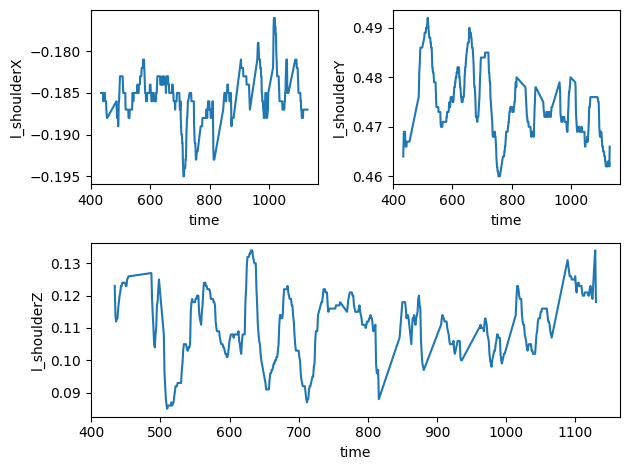

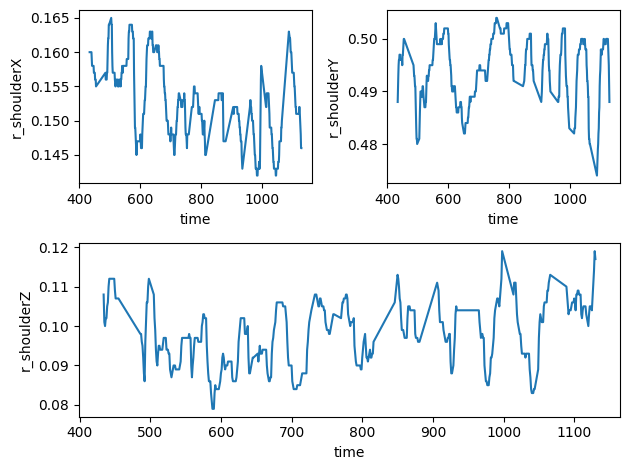

In [9]:
tabs = pn.Tabs(('L Shoulder', fig_0),('R Shoulder', fig_1))

## Create the Template

In [10]:
#Layout using Template
template = pn.template.BootstrapTemplate(
    title='Data analysis for motor disabilities rehabilitation of the upper limbs using augmented reality', 
    sidebar=[pn.pane.Markdown(""), 
             pn.pane.Markdown("#### Choose the dataframe"), 
             select_df,
            ],
    main= [pn.Row(tabs)],
    accent_base_color="#87d8b1",
    header_background="#8508b0",
)
template.show()
template.servable();

Launching server at http://localhost:35985
